---

<center>

# **12 Steps to Navier-Stokes**

<center>

---


## Step 4: Burger's Equation in 1D

---

Burger's equation is a **convection-diffusion equation** it's a fundamental partial differential equation that captures two key processes:

* Nonlinear convenction
* Diffusion

It can be derived from the 1D Navier-Stokes equation by neglecting the pressure gradient and assuming constant density in abscense of external forces. It's great for studying shock formation (when $\nu$ is small) and viscous diffusion (when $\nu$ is large).

The equation

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial ^2u}{\partial x^2}$$

We can discretize it using the methods we've already detailed in Steps [1](./Step_1.ipynb) to [3](./Step_3.ipynb).  Using forward difference for time, backward difference for space and our 2nd-order method for the second derivatives yields:

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + u_i^n \frac{u_i^n - u_{i-1}^n}{\Delta x} = \nu \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2}$$

As before, once we have an initial condition, the only unknown is $u_i^{n+1}$. We will step in time as follows:

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

### Analytical solution

This time we will do something different, Burger's equation can be converted to a linear equation by the Cole-Hopf transformation such that we can arrive to an analytical solution to contrast with the numerical equation we will get from applying our discretization.

The procces to linearize Burger's equation requires a specific set of IC's and BC's defined by

Our initial condition for this problem is going to be:


$$u = -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4 $$
$$\phi = \exp \bigg(\frac{-x^2}{4 \nu} \bigg) + \exp \bigg(\frac{-(x-2 \pi)^2}{4 \nu} \bigg)$$


The analytical solution is given by:

$$u = -\frac{2 \nu}{\phi} \frac{\partial \phi}{\partial x} + 4$$
$$\phi = \exp \bigg(\frac{-(x-4t)^2}{4 \nu (t+1)} \bigg) + \exp \bigg(\frac{-(x-4t -2 \pi)^2}{4 \nu(t+1)} \bigg)$$

Our boundary condition will be:

$$u(0) = u(2\pi)$$

This is called a *periodic* boundary condition.

Next I'll be using `sympy` and `numpy` to evaluate the derivatives and obtain the analytical solution

In [1]:
import sympy as smp
import numpy as np

In [16]:
# Define symbols, phi, it's derivative and u

x, nu, t = smp.symbols(r'x \nu t')

phi = smp.exp((-(x-4*t)**2) / (4*nu*(t+1))) + smp.exp((-(x-4*t-2*smp.pi)**2) / (4*nu*(t+1)))
phi_d = smp.diff(phi, x, 1)

u = -(2*nu) * (phi_d / phi) + 4


In [17]:
# Lambdify the expressions

u_func = smp.lambdify((t, x, nu), u)

### Back to Burger's equation

Now that we have the IC's set up, let's do a plot to visualize how it looks

In [19]:
import matplotlib.pyplot as plt
import time, sys
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

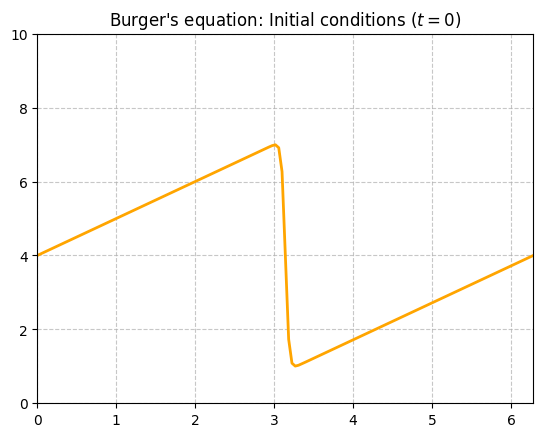

In [89]:
grid_points = 151                              # Number of grid points
grid_length = 2*np.pi                          # Lenght of the grid
dx = grid_length / (grid_points - 1)           # Distance between adjacent grid points
time_steps = 101                               # Number of time steps
# sigma = 0.25                                 # CFL number
dt = dx * nu                                   # Size of time steps
nu = 0.07                                      # Diffusion coefficient

x = np.linspace(0, grid_length, grid_points)
u_n = np.empty(grid_points)
t_0 = 0

u = np.asarray([u_func(t_0, x0, nu) for x0 in x])

fix, ax = plt.subplots()
ax.plot(x, u, c='orange', lw=2)
ax.set_title(r"Burger's equation: Initial conditions ($t=0$)")
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 10)
ax.grid(True, alpha=0.7, linestyle="--")

This is called a **saw-tooth function**.

Now, back with the numerical part. Recall the discretization of the Burger's equation 

$$u_i^{n+1} = u_i^n - u_i^n \frac{\Delta t}{\Delta x} (u_i^n - u_{i-1}^n) + \nu \frac{\Delta t}{\Delta x^2}(u_{i+1}^n - 2u_i^n + u_{i-1}^n)$$

Linking the concept of periodic BC with $u_{i+1}^{n}$ for $i$ at the end of the frame (i.e equal to $2\pi$) we get that it has to have the same value as $i$ at the start of the frame (i.e equal to 0), the wave wraps itself around the frame.

Translating our discretization and this concept of wrapping around the frame to the iteration loop, we get

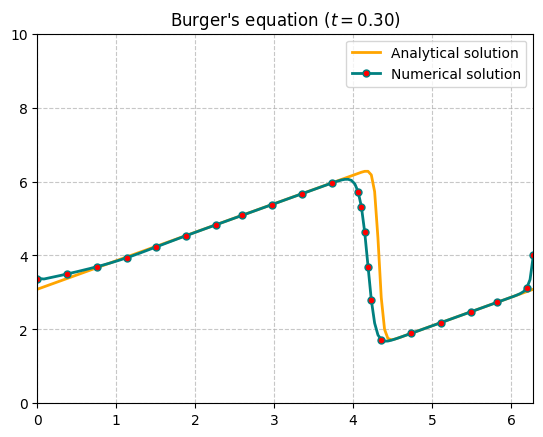

In [ ]:
for n in range(time_steps):
    u_n = u.copy()
    for i in range(1, grid_points - 1):
        u[i] = u_n[i] - u_n[i] * (dt / dx) * (u_n[i] - u_n[i-1]) + nu * (dt / (dx**2)) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])
    u[0] = u_n[0] - u_n[0] * (dt / dx) * (u_n[0] - u_n[-2]) + nu * (dt / (dx**2)) * (u_n[1] - 2*u_n[0] + u_n[-2])
    u[-i] = u[0]

u_analytical = np.asarray([u_func(time_steps*dt, x0, nu) for x0 in x])

fix, ax = plt.subplots()
ax.plot(x, u_analytical, c='orange', lw=2, label='Analytical solution')
ax.plot(x, u, lw=2, c='#008080',marker='o', markerfacecolor='red', markevery=0.05, markersize=5, label='Numerical solution')
ax.set_title(rf"Burger's equation ($t={time_steps*dt:.2f}$)")
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(0, 8)
ax.legend()
ax.grid(True, alpha=0.7, linestyle="--")

We see that the difference between the numerical and the analytical solution it's not much in this case, this difference gets affected by the values we choose for `grid_points` and `time_steps`.

Now, animated

In [ ]:
grid_points = 101                              # Number of grid points
grid_length = 2*np.pi                          # Lenght of the grid
dx = grid_length / (grid_points - 1)           # Distance between adjacent grid points
time_steps = 301                               # Number of time steps
# sigma = 0.25                                 # CFL number
dt = dx * nu                                   # Size of time steps
nu = 0.07                                      # Diffusion coefficient

x = np.linspace(0, grid_length, grid_points)

plt.ioff()

fig, ax2 = plt.subplots()
ax2.set_title(rf"Burger's equation (from $t=0$ to $t={time_steps*dt:.2f}$)", fontsize = 12)
ax2.set_xlabel("x", fontsize=12)
ax2.set_ylabel("u", fontsize=12)
ax2.set_xlim(0, 2*np.pi)
ax2.set_ylim(0, 8)
ax2.grid(True, linestyle='--', alpha=0.7)

analitical, = ax2.plot([], [], c='orange', lw=2, label='Analytical solution')
numerical, = ax2.plot([], [], lw=2, c='#008080',marker='o', markerfacecolor='red', markevery=0.05, markersize=5, label='Numerical solution')
ax2.legend()

u = np.asarray([u_func(t_0, x0, nu) for x0 in x])

def init():
    analitical.set_data([], [])
    numerical.set_data([], [])
    return analitical, numerical,

def update_anim(frame):
    u_n = u.copy()
    for i in range(1, grid_points-1):
        u[i] = u_n[i] - u_n[i] * (dt / dx) * (u_n[i] - u_n[i-1]) + nu * (dt / (dx**2)) * (u_n[i+1] - 2*u_n[i] + u_n[i-1])
    u[0] = u_n[0] - u_n[0] * (dt / dx) * (u_n[0] - u_n[-2]) + nu * (dt / (dx**2)) * (u_n[1] - 2*u_n[0] + u_n[-2])
    u[-1] = u[0]

    u_analytical = np.asarray([u_func(frame*dt, x0, nu) for x0 in x])

    analitical.set_data(x, u_analytical)
    numerical.set_data(x, u)

    return analitical, numerical,

anim = animation.FuncAnimation(
                fig = fig,
                func = update_anim,
                init_func = init,
                frames = time_steps,
                interval = 50,
                blit = True
)

anim.save('1D_Burger_equation.mp4', writer=animation.FFMpegWriter(fps=30))

plt.ion()

print(dt)

0.004398229715025711


We can see how the numerical solution wraps around and getd diffused (a little, based on $\nu$). Also notice that the analytial solution does not wrap around, that is because how it is defined. To solve for that problem one should define the analytical solution `u_func` in $mod$ $2\pi$ such that the values "reset".